In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 

In [2]:
wine_dataset = pd.read_csv('./wine.csv')

In [3]:
wine_dataset.head(10)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   
5     1    14.20   1.76  2.45        15.2        112     3.27        3.39   
6     1    14.39   1.87  2.45        14.6         96     2.50        2.52   
7     1    14.06   2.15  2.61        17.6        121     2.60        2.51   
8     1    14.83   1.64  2.17        14.0         97     2.80        2.98   
9     1    13.86   1.35  2.27        16.0         98     2.98        3.15   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
5           0.34             1.97   6.75  1.05      2.85     1450  
6           0.30             1.98   5.25  1.02      3.58     1290  
7           0.31             1.25   5.05  1.06      3.58     1295  
8           0.29             1.98   5.20  1.08      2.85     1045  
9           0.22             1.85   7.22  1.01      3.55     1045

In [4]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine_dataset.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
wine_dataset.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

<Axes: >

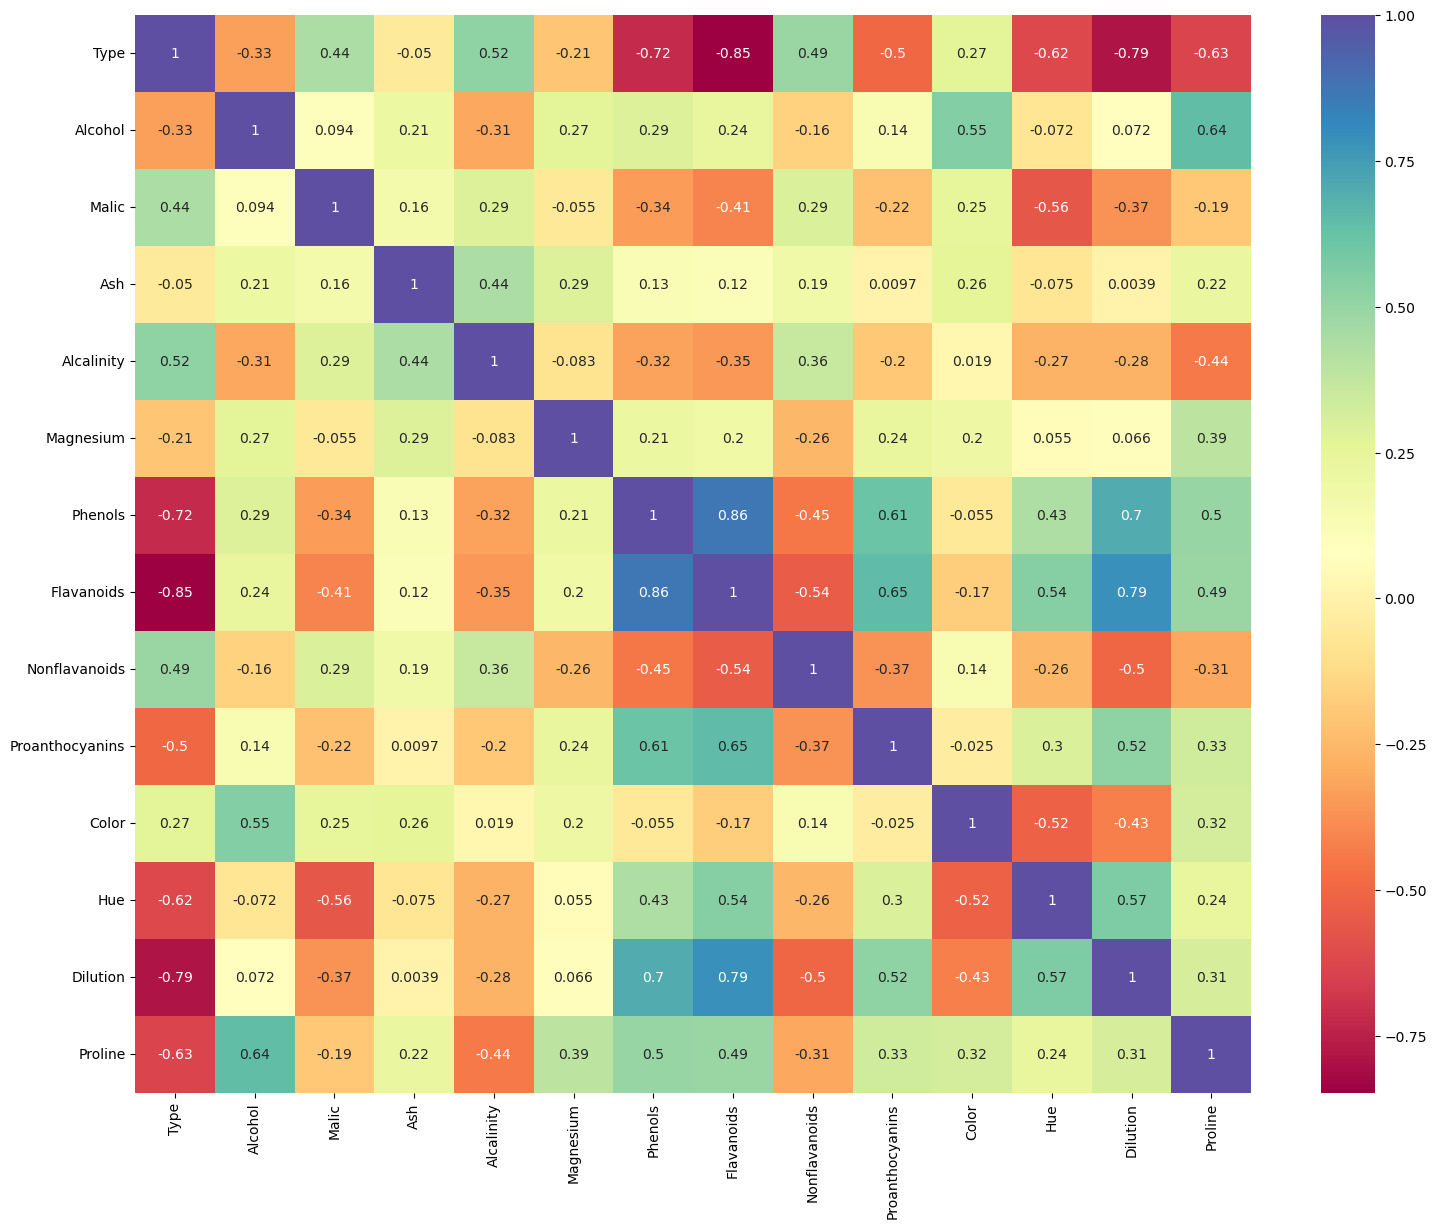

In [7]:
plt.figure(figsize=(18,14))
sns.heatmap(wine_dataset.corr(), annot=True,cmap="Spectral")

<Axes: xlabel='Alcalinity'>

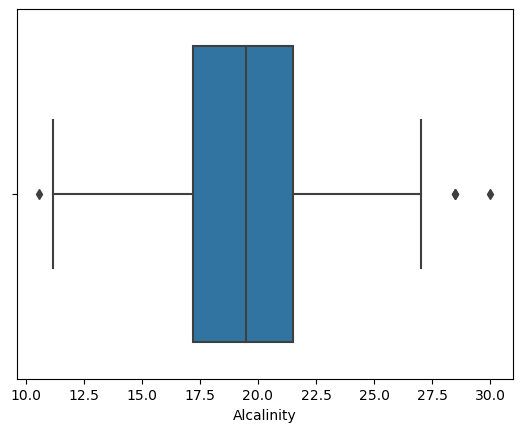

In [8]:
sns.boxplot(x="Alcalinity", data = wine_dataset)

<Axes: xlabel='Proline'>

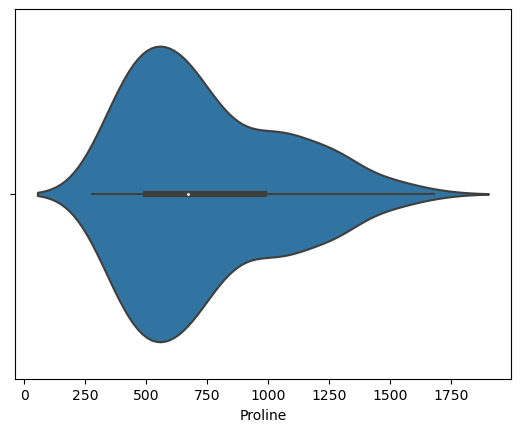

In [9]:
sns.violinplot(x="Proline", data = wine_dataset)

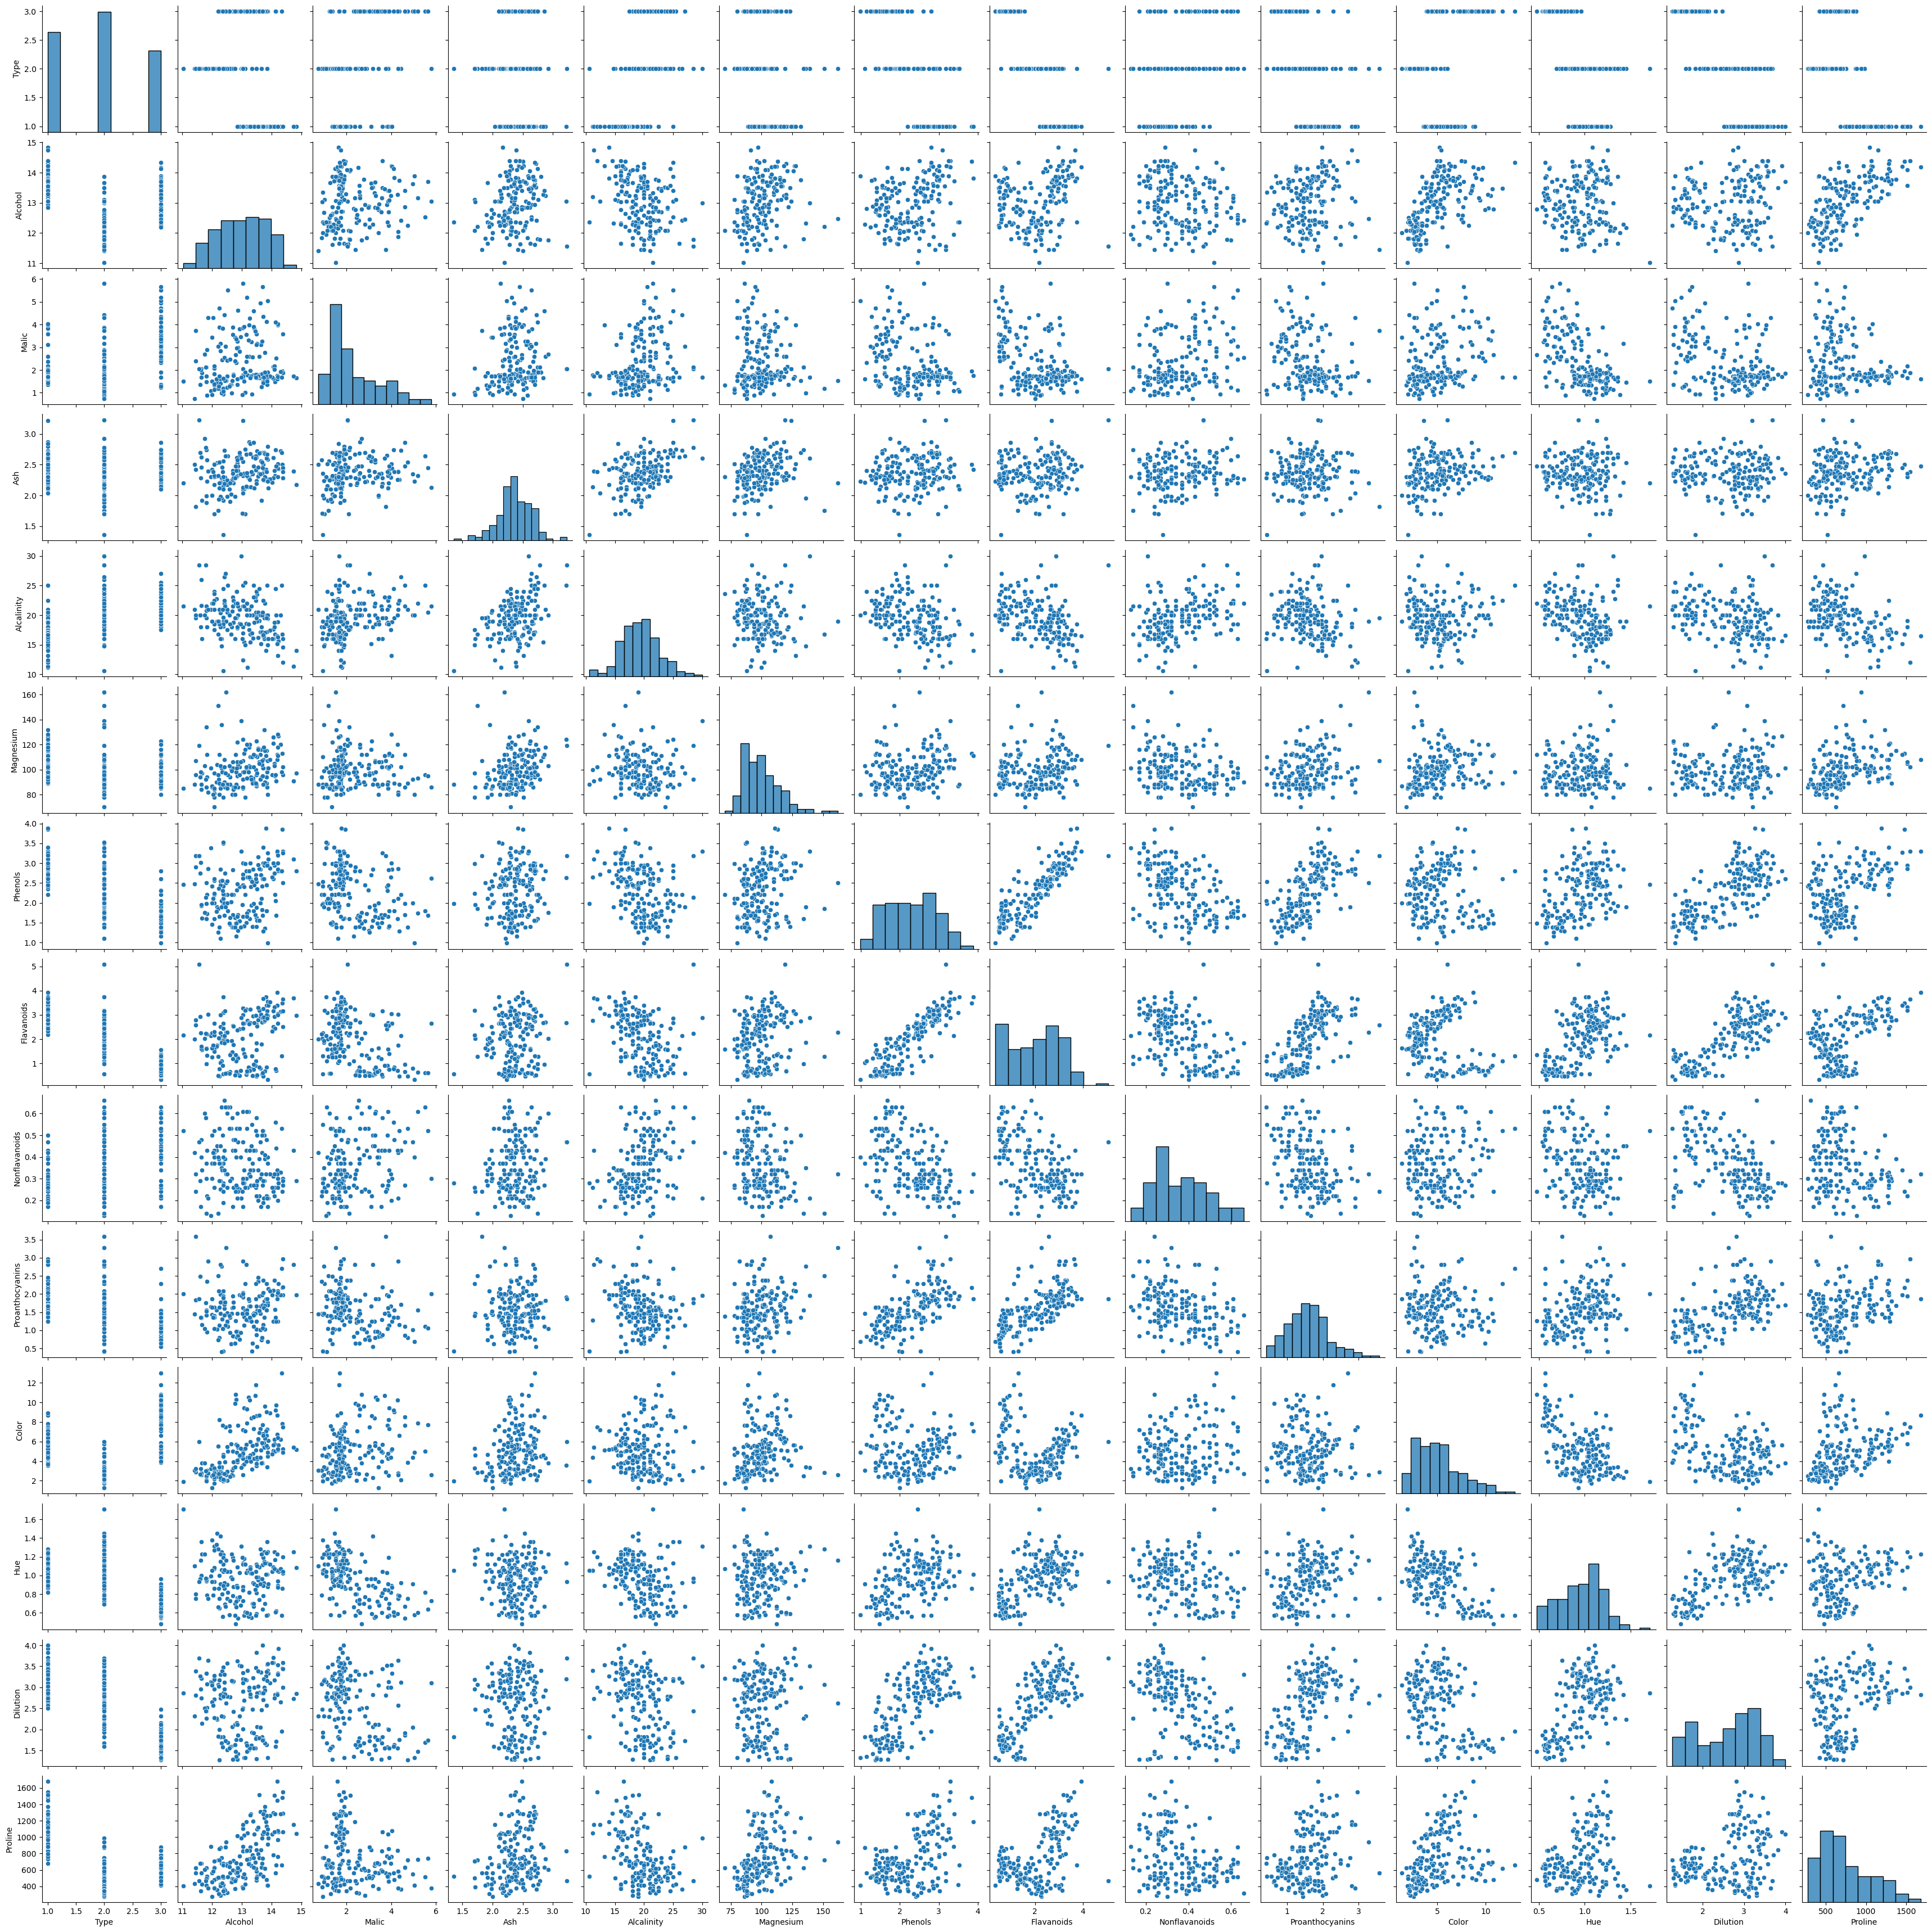

In [10]:
sns.pairplot(data = wine_dataset)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_dataset2 = scaler.fit_transform(wine_dataset)
wine_dataset2

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
pca = PCA()
pca_values = pca.fit_transform(wine_dataset2)

In [14]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [15]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_dataset2)

In [16]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

In [46]:
pca_df = pd.DataFrame(data = pca_values, columns = ['PCA1', 'PCA2','PCA3', 'PCA4','PCA5', 'PCA6'])
pca_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716
1   -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309
2   -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842
3   -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616
4   -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762
..        ...       ...       ...       ...       ...       ...
173  3.627996 -2.206617 -0.343668  0.751705 -1.004109 -1.143155
174  2.942729 -1.752263  0.207480  0.399381  0.154223 -0.062465
175  3.027272 -2.756040 -0.940803  0.607758  1.128136  0.005290
176  2.755222 -2.293784 -0.550474 -0.391570  1.067083  1.012562
177  3.496336 -2.760608  1.013151  0.349630 -1.005136  0.377223

[178 rows x 6 columns]

In [17]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42])

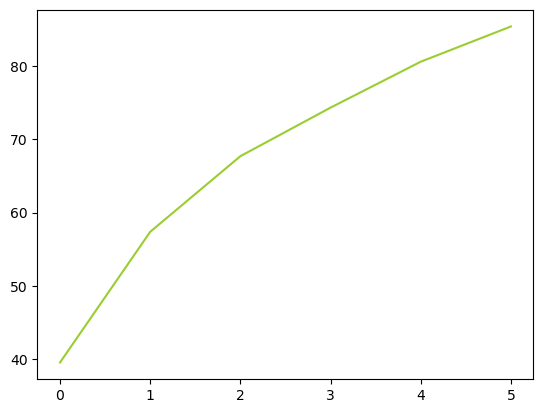

In [18]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="yellowgreen")

In [ ]:
pca_values[:,0:1]

In [ ]:
pca_values[:,0:2]

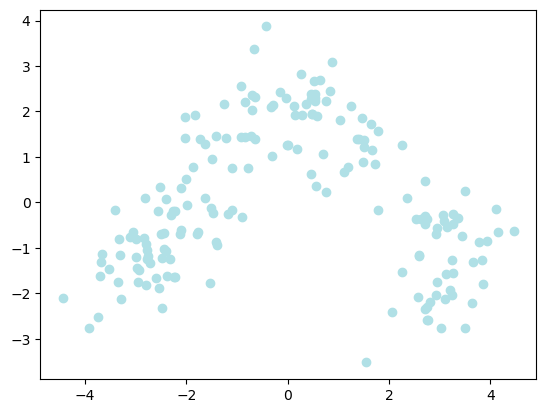

In [20]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y,c="powderblue")

In [22]:
PCA_KMeans=pca_values[:,0:3]

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(PCA_KMeans)
    wcss.append(kmeans.inertia_)

D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

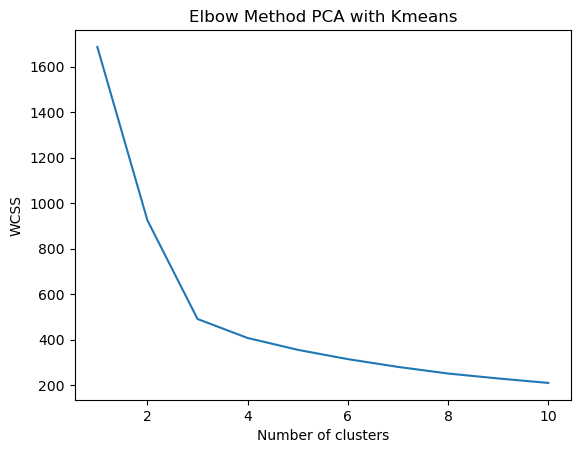

In [24]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method PCA with Kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from sklearn.cluster import KMeans
PCA_Kmeans_cluster = KMeans(3, random_state=42)
PCA_Kmeans_cluster.fit(PCA_KMeans)

D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [26]:
df_PCA_Kmeans_cluster= pd.concat([wine_dataset.reset_index(drop=True),pd.DataFrame(PCA_KMeans)],axis=1)
df_PCA_Kmeans_cluster.columns.values[-3:]=['pc1','pc2','pc3']
df_PCA_Kmeans_cluster['PCAKmeans']=PCA_Kmeans_cluster.labels_

In [27]:
df_PCA_Kmeans_cluster.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline       pc1  \
0           0.28             2.29   5.64  1.04      3.92     1065 -3.522934   
1           0.26             1.28   4.38  1.05      3.40     1050 -2.528858   
2           0.30             2.81   5.68  1.03      3.17     1185 -2.785029   
3           0.24             2.18   7.80  0.86      3.45     1480 -3.922588   
4           0.39             1.82   4.32  1.04      2.93      735 -1.407511   

        pc2       pc3  PCAKmeans  
0 -1.453098 -0.164795          1  
1  0.330019 -2.026707          1  
2 -1.036936  0.983238          1  
3 -2.768210 -0.174968          1  
4 -0.867773  2.025829          1

Text(0, 0.5, 'pc2')

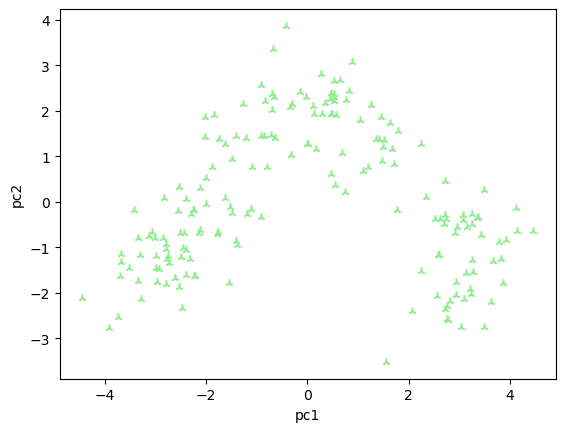

In [39]:
plt.scatter(df_PCA_Kmeans_cluster.pc1,df_PCA_Kmeans_cluster.pc2,marker="2", c= 'lightgreen')
plt.xlabel('pc1')
plt.ylabel('pc2')

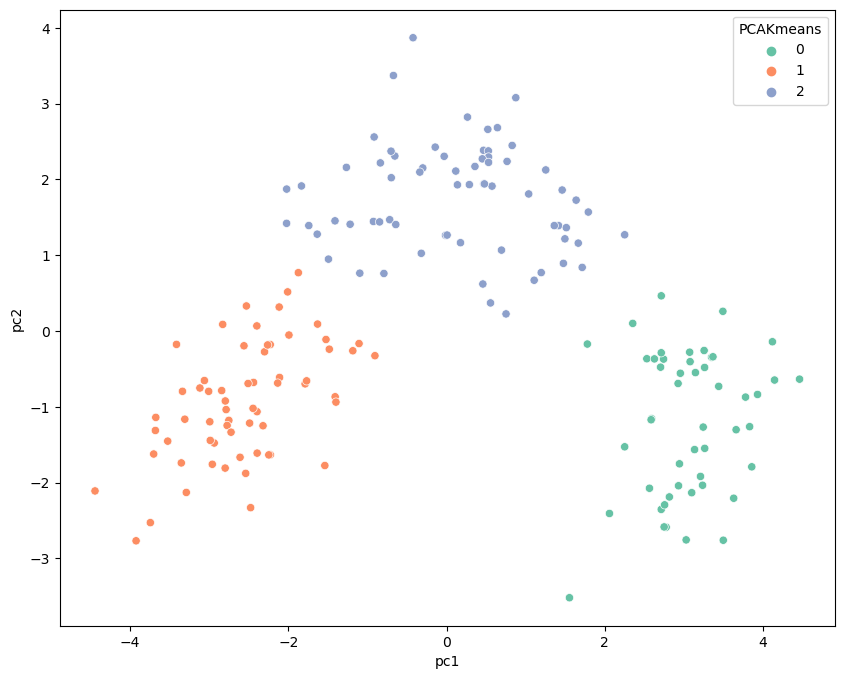

In [36]:
import seaborn as sns
#plot between PCA1 and PCA2 
x_axis = df_PCA_Kmeans_cluster['pc1']
y_axis = df_PCA_Kmeans_cluster['pc2']
plt.figure(figsize=(10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue=df_PCA_Kmeans_cluster['PCAKmeans'], palette= 'Set2')
plt.show()